# 实现线性回归

[Link](https://zh-v2.d2l.ai/chapter_linear-networks/linear-regression-scratch.html#sec-linear-scratch)

首先生成数据集

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def Synthetic_data(w, b, num_examples): #@save
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = Synthetic_data(true_w, true_b, 1000)

features: tensor([-0.6196,  0.0915]) 
label: tensor([2.6471])


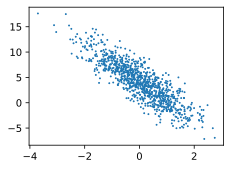

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [13]:
# 读取数据集
## 并生成 batch_size 大小的 mini-batch，余下不整除的部分自成一批
def Data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # So it will read the data in a shuffled sequence
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [14]:
batch_size = 10

for X, y in Data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.6588,  0.1745],
        [ 0.2546, -3.1181],
        [-0.1413, -0.8167],
        [ 0.2819, -0.4506],
        [-0.7216, -0.3987],
        [-1.2916, -0.2178],
        [ 0.0917, -0.7436],
        [-0.1782, -0.0538],
        [-1.2662, -0.0934],
        [-0.3867,  1.1194]]) 
 tensor([[ 2.2854],
        [15.3058],
        [ 6.6871],
        [ 6.2922],
        [ 4.0976],
        [ 2.3455],
        [ 6.9244],
        [ 4.0350],
        [ 1.9667],
        [-0.3688]])


In [ ]:
# Init the parameters of the model
## We use mini-batch to train the model
omega = torch